# Zaman Serileri

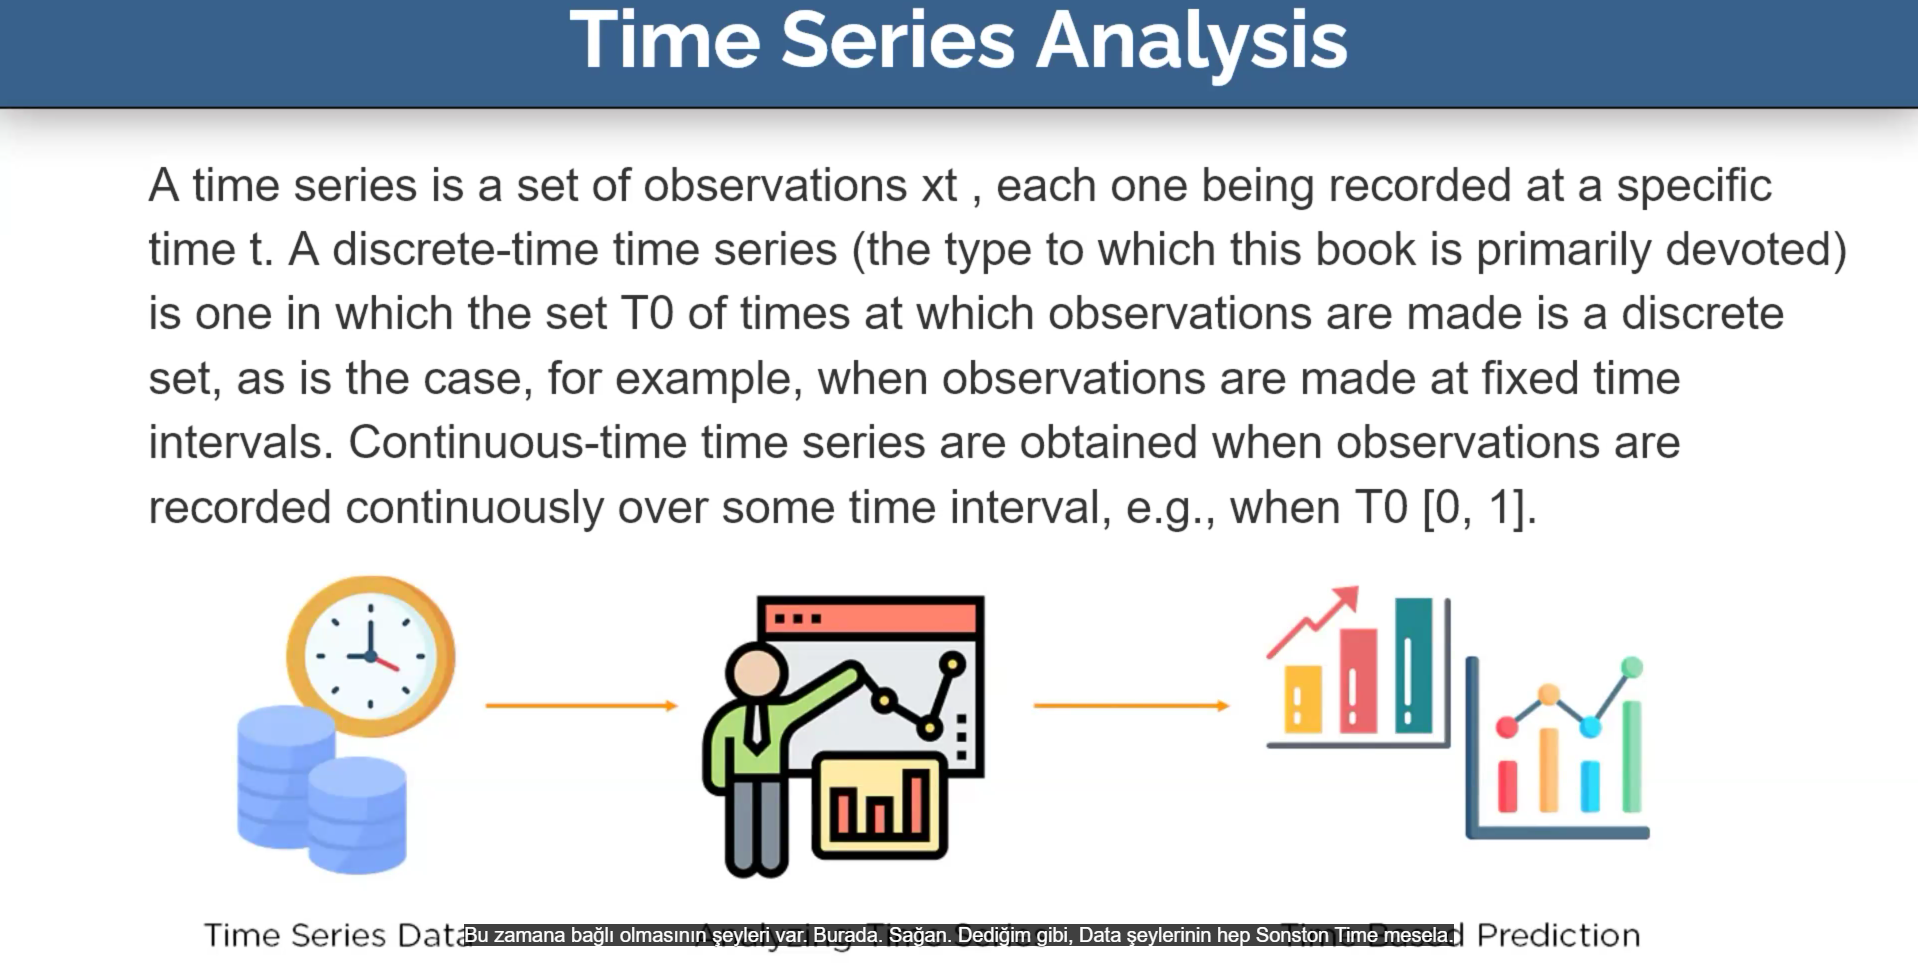

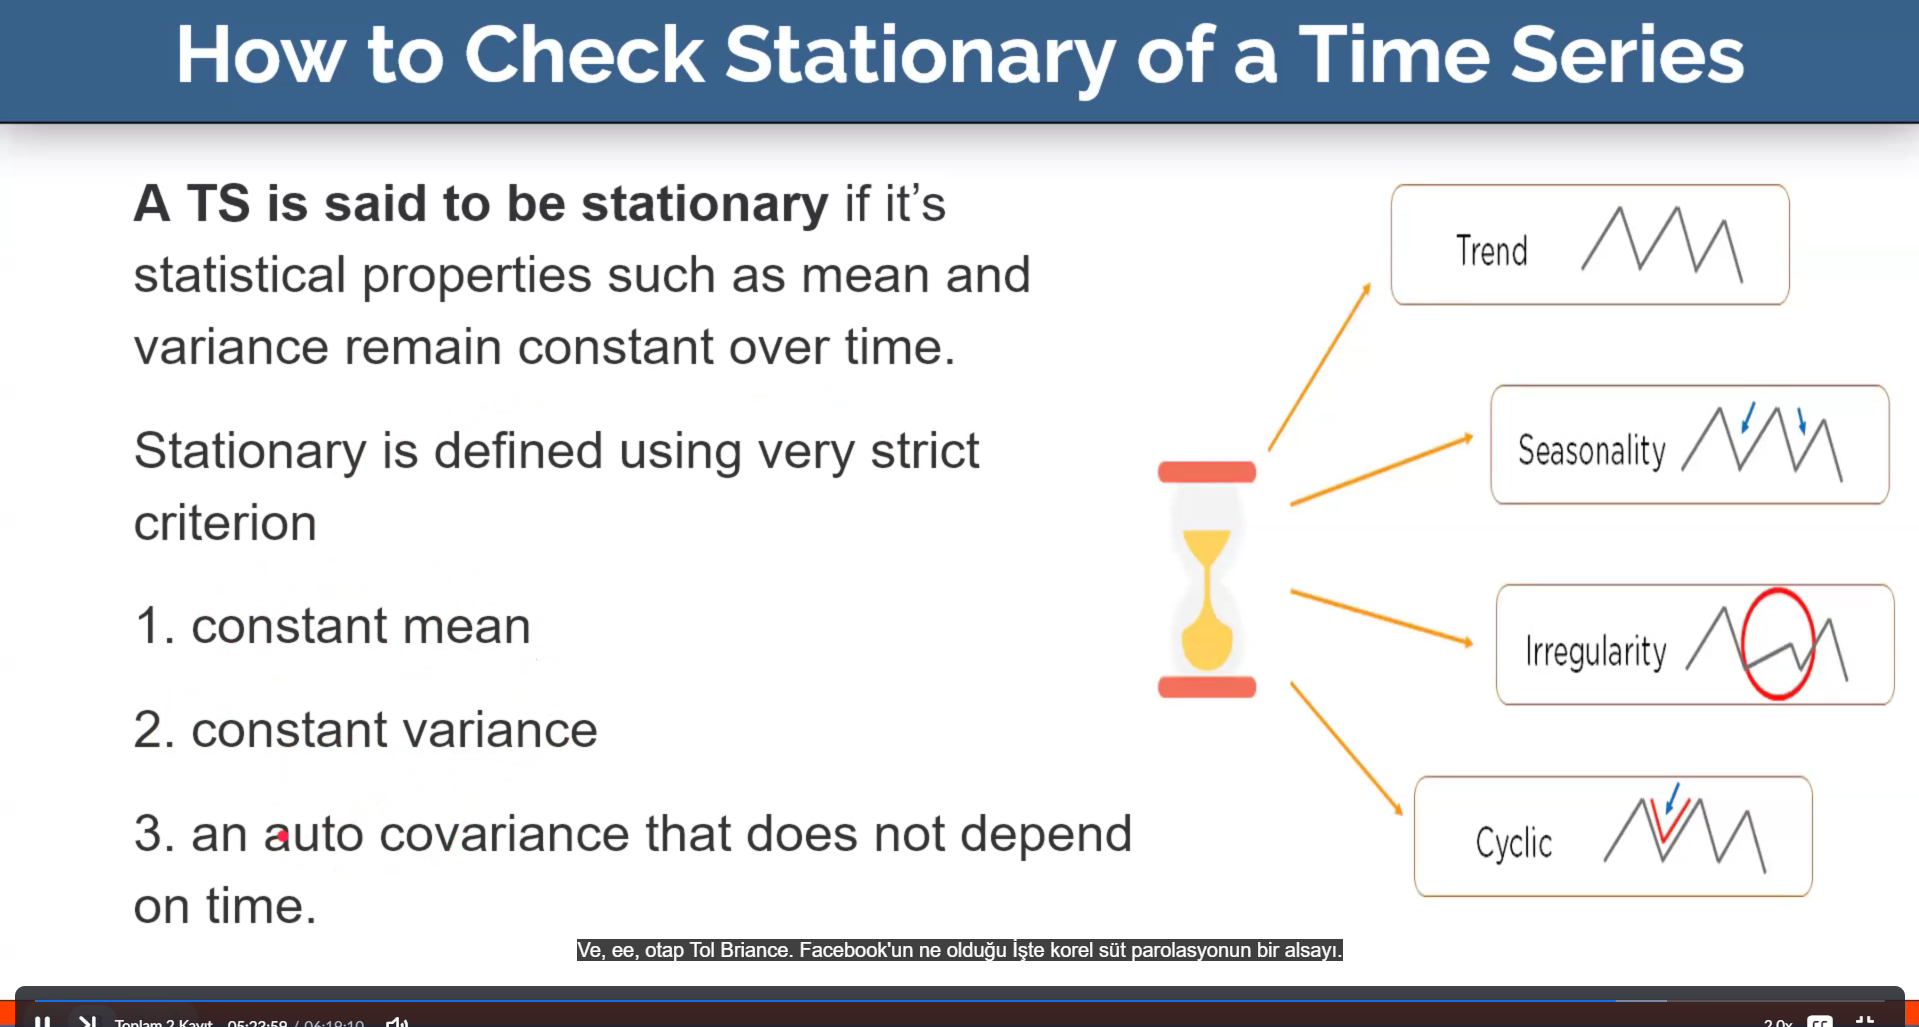

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df=pd.read_csv("DailyDelhiClimateTrain.csv")
#her gün aynı saatte toplanmış bir veri

In [3]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure
0  2013-01-01  10.000000  84.500000    0.000000   1015.666667
1  2013-01-02   7.400000  92.000000    2.980000   1017.800000
2  2013-01-03   7.166667  87.000000    4.633333   1018.666667
3  2013-01-04   8.666667  71.333333    1.233333   1017.166667
4  2013-01-05   6.000000  86.833333    3.700000   1016.500000

In [5]:
figure=px.line(df,x="date",y="meantemp")
figure.show()
#px te grafik canlı oluyor

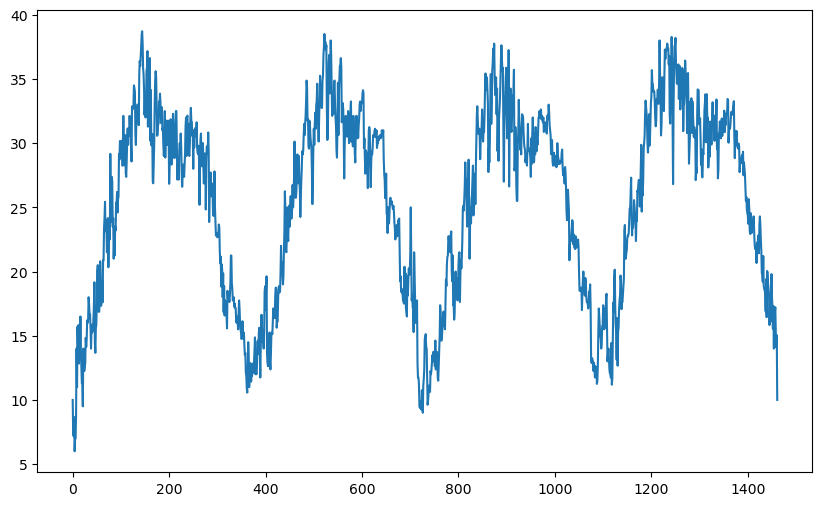

In [6]:
df.meantemp.plot(figsize=(10,6))
plt.show()

In [8]:
px.line(df,x="date",y="meantemp", title="Mean Temperature")

In [9]:
px.line(df,x="date",y="humidity", title="Humidty Temperature") # Sıcaklıkla ters

In [10]:
px.line(df,x="date",y="wind_speed", title="Wind Speed Temperature")

In [13]:
    px.scatter(df,x="humidity",y="meantemp", trendline="ols", title="Mean Pressure Temperature")
    #istenirse 'size' kullanabilirsiniz

In [14]:
df['date']=pd.to_datetime(df['date'],format="%Y-%m-%d")#tarihi datetime a çevirdik
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day

In [15]:
df.head()

date   meantemp   humidity  wind_speed  meanpressure  year  month  day
0 2013-01-01  10.000000  84.500000    0.000000   1015.666667  2013      1    1
1 2013-01-02   7.400000  92.000000    2.980000   1017.800000  2013      1    2
2 2013-01-03   7.166667  87.000000    4.633333   1018.666667  2013      1    3
3 2013-01-04   8.666667  71.333333    1.233333   1017.166667  2013      1    4
4 2013-01-05   6.000000  86.833333    3.700000   1016.500000  2013      1    5

<Axes: xlabel='month', ylabel='meantemp'>

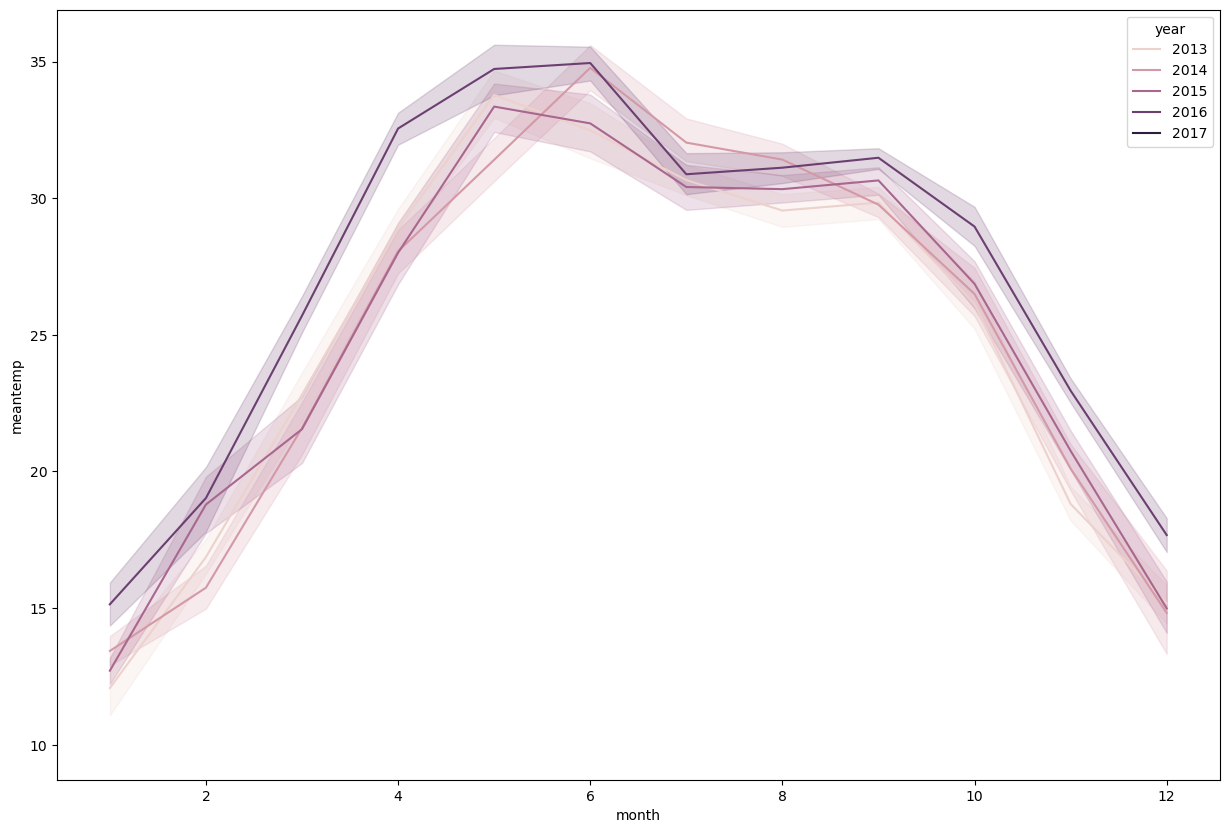

In [16]:
plt.figure(figsize=(15,10))
sns.lineplot(x="month",y="meantemp",hue="year",data=df)

In [17]:
#pip install prophet

Note: you may need to restart the kernel to use updated packages.Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/13.3 MB 487.6 kB/s eta 0:00:28
   ---------------------------------------- 0.1/13.3 MB 744.7 kB/s eta 0:00:18
    --------------------------------------- 0.2/13.3 MB 1.0 MB/s eta 0:00:13
    --------------------------------------- 0.2/13.3 MB 1.1 MB/s eta 0:00:13
   - -------------------------------------- 0.4/13.3 MB 1.5 MB/s eta 0:00:09
   - -------------------------------------- 0.5/13.3 MB 1.7 MB/s eta 0:00:08
   - -------------------------------------- 0.6/13.3 MB 1.8 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/13.3 MB 2.0 MB/s eta 0:00:07
   -- ------------------------------------- 0.8/13.3 MB 2.0 MB/s eta 0:00:07
   -- --------------

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [20]:
forecast_data=df.rename(columns={"date":"ds","meantemp":"y"})

In [30]:
from prophet import Prophet
from prophet.plot import plot_plotly
m=Prophet()
m.fit(forecast_data)
future=m.make_future_dataframe(periods=365)
forecasts=m.predict(future)
forecasts

00:21:04 - cmdstanpy - INFO - Chain [1] start processing
00:21:05 - cmdstanpy - INFO - Chain [1] done processing


ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0    2013-01-01  24.689997    9.371136   14.318553    24.689997    24.689997   
1    2013-01-02  24.690142    9.256044   14.371084    24.690142    24.690142   
2    2013-01-03  24.690287    9.047834   14.424162    24.690287    24.690287   
3    2013-01-04  24.690432    9.267458   14.406941    24.690432    24.690432   
4    2013-01-05  24.690577    9.093528   14.317685    24.690577    24.690577   
...         ...        ...         ...         ...          ...          ...   
1822 2017-12-28  28.583674   13.151342   18.457449    28.001219    29.203159   
1823 2017-12-29  28.586590   13.087135   18.347110    28.001583    29.208020   
1824 2017-12-30  28.589506   12.823468   18.302594    28.001947    29.213676   
1825 2017-12-31  28.592422   12.637409   18.051660    28.002310    29.221942   
1826 2018-01-01  28.595337   12.880397   18.275211    28.002674    29.227907   

      additive_terms  additive_terms_lower  additive_terms_upper    weekly  \
0         -12.939197            -12.939197            -12.939197  0.034058   
1         -12.803590            -12.803590            -12.803590  0.146275   
2         -12.844073            -12.844073            -12.844073  0.067163   
3         -12.831776            -12.831776            -12.831776  0.027535   
4         -12.865204            -12.865204            -12.865204 -0.069124   
...              ...                   ...                   ...       ...   
1822      -12.795808            -12.795808            -12.795808  0.067163   
1823      -12.895281            -12.895281            -12.895281  0.027535   
1824      -13.029973            -13.029973            -13.029973 -0.069124   
1825      -13.173327            -13.173327            -13.173327 -0.195063   
1826      -12.987347            -12.987347            -12.987347 -0.010844   

      weekly_lower  weekly_upper     yearly  yearly_lower  yearly_upper  \
0         0.034058      0.034058 -12.973255    -12.973255    -12.973255   
1         0.146275      0.146275 -12.949865    -12.949865    -12.949865   
2         0.067163      0.067163 -12.911235    -12.911235    -12.911235   
3         0.027535      0.027535 -12.859310    -12.859310    -12.859310   
4        -0.069124     -0.069124 -12.796081    -12.796081    -12.796081   
...            ...           ...        ...           ...           ...   
1822      0.067163      0.067163 -12.862971    -12.862971    -12.862971   
1823      0.027535      0.027535 -12.922815    -12.922815    -12.922815   
1824     -0.069124     -0.069124 -12.960850    -12.960850    -12.960850   
1825     -0.195063     -0.195063 -12.978264    -12.978264    -12.978264   
1826     -0.010844     -0.010844 -12.976502    -12.976502    -12.976502   

      multiplicative_terms  multiplicative_terms_lower  \
0                      0.0                         0.0   
1                      0.0                         0.0   
2                      0.0                         0.0   
3                      0.0                         0.0   
4                      0.0                         0.0   
...                    ...                         ...   
1822                   0.0                         0.0   
1823                   0.0                         0.0   
1824                   0.0                         0.0   
1825                   0.0                         0.0   
1826                   0.0                         0.0   

      multiplicative_terms_upper       yhat  
0                            0.0  11.750800  
1                            0.0  11.886552  
2                            0.0  11.846214  
3                            0.0  11.858656  
4                            0.0  11.825373  
...                          ...        ...  
1822                         0.0  15.787866  
1823                         0.0  15.691309  
1824                         0.0  15.559533  
1825                         0.0  15.419094  
1826       

In [33]:
plot_plotly(m,forecasts)